In [15]:
import pandas as pd
from datetime import datetime


In [56]:
# Carregar os dados do arquivo .txt
arquivo_txt = "C:\\Users\\alysson.assis\\OneDrive - ARAXA\\Documentos\\Tópicos especiais-Python in Environmental Applications\\2748013_Chuvas_mod.txt"  # nome do arquivo de entrada
df = pd.read_csv(arquivo_txt, delimiter=';')

#df = df.drop(columns=['coluna', 'coluna2'], inplace=True)
#df=df['Data']
novo_df = df[['Data', 'Maxima']]
novo_df['Maxima'] = novo_df['Maxima'].astype(float)
novo_df.describe()

ValueError: could not convert string to float: '21,5'

In [53]:
df[]
mean = df['Maxima'].mean()
std = novo_df['Maxima'].std()
number_elements = len(novo_df['Maxima'])

TypeError: Could not convert string '69,221,556,141,719,439,623,236,315,627,735,0157,6143,553,979,144,67,051,118,025,419,431,065,440,730,037,620,280,894,347,137,736,454,847,315,615,832,440,470,8103,616,1109,423,045,442,427,818,314,011,811,9204,660,716,652,150,957,245,297,618,411,217,324,348,6107,147,578,467,920,558,241,626,444,4120,97,526,427,651,424,522,535,130,489,027,920,445,418,230,751,477,429,040,237,127,252,432,431,683,314,8131,773,214,830,924,613,313,443,3164,521,946,938,141,478,934,4116,326,344,534,587,529,074,48,043,652,355,542,712,073,416,437,216,318,721,542,242,496,240,236,5' to numeric

In [ ]:
#!pip install matplotlib

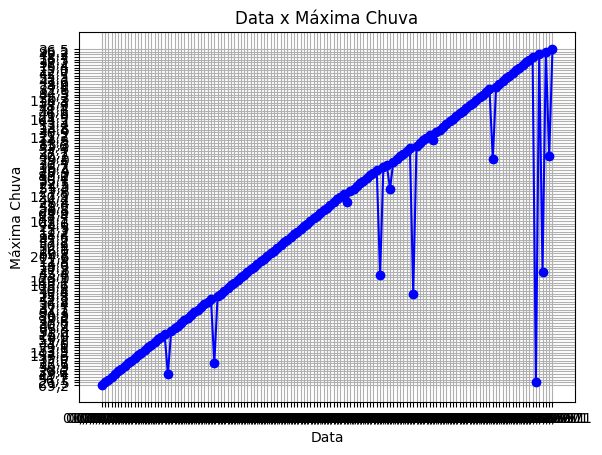

In [47]:
import matplotlib.pyplot as plt

# Dados de exemplo
x = novo_df['Data'].tolist()
y = novo_df['Maxima'].tolist()

# Criar o gráfico de linhas
plt.plot(x, y, marker='o', linestyle='-', color='b')

# Títulos e rótulos
plt.title('Data x Máxima Chuva')
plt.xlabel('Data')
plt.ylabel('Máxima Chuva')

# Exibir o gráfico
plt.grid(True)  # Adicionar grades ao gráfico
plt.show()


In [ ]:
# Importando patches para adicionar item de legenda
import matplotlib.patches as mpatches

# Potando dados válidos e adicionando o eixo de plotagem a uma variável
ax = novo_df['Data'].plot(ylabel='Concentração de SO2')

# Plotando a área do desvio padrão
mean = filtred_so2_df['Valor'].mean()
std = filtred_so2_df['Valor'].std()
number_elements = len(filtred_so2_df['Valor'])

ax.fill_between(
    filtred_so2_df.index, number_elements * [mean - std], number_elements * [mean + std],
    color='green', alpha=.2)

# Pegando um valor médio
mean_df = filtred_so2_df[['Valor']].copy()
mean_df.loc[:, 'Mean'] = mean
mean_df = mean_df[['Mean']]
mean_df.plot(ax=ax)

# Adicionando Standard Deviation na legenda
std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = ax.get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
ax.legend(handles, labels)

In [29]:
# Filtrando dados válidos de SO2, para a estação BA_010.
# Para tornar didática a visualização, vamos manter somente valores abaixo de 150
filtred_df = df.loc[
    (df['Data'] == 'Data') & # Filtrando apenas poluentes em SO2
    (df['Maxima'] == 'Maxima')] # Filtrando apenas poluentes em SO2]
#    (df['Valor'] >= 0) &         # Filtrando apenas valores maiores que 0
#    (df['Valor'] <= 150)         # Filtrando apenas valores menores que 150, para fins didáticos
#]

# Formatando data e adicionando ao índice
#filtred_so2_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)

# Colocando a coluna "Data" como índice
#filtred_df = filtred_df.set_index('Data')

# Selecionando somente os dados importantes para minha análise
filtred_df = filtred_df[['Data', 'Maxima']]
filtred_df

,Data,Maxima


In [13]:
# Obtendo estatísticas
filtred_so2_df.describe()

NameError: name 'filtred_so2_df' is not defined

In [14]:
!pip install matplotlib

     ---------------------------------------- 7.8/7.8 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 216.0/216.0 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 104.1/104.1 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Importando patches para adicionar item de legenda
import matplotlib.patches as mpatches

# Potando dados válidos e adicionando o eixo de plotagem a uma variável
ax = filtred_so2_df['Valor'].plot(ylabel='Concentração de SO2')

# Plotando a área do desvio padrão
mean = filtred_so2_df['Valor'].mean()
std = filtred_so2_df['Valor'].std()
number_elements = len(filtred_so2_df['Valor'])

ax.fill_between(
    filtred_so2_df.index, number_elements * [mean - std], number_elements * [mean + std],
    color='green', alpha=.2)

# Pegando um valor médio
mean_df = filtred_so2_df[['Valor']].copy()
mean_df.loc[:, 'Mean'] = mean
mean_df = mean_df[['Mean']]
mean_df.plot(ax=ax)

# Adicionando Standard Deviation na legenda
std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = ax.get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
ax.legend(handles, labels)